# Singfake Dataset

*In this notebook, the logistic regression model was used for the detection of AI generated videos through investigating the relationship between the amount of views,likes and comments on the respective videos. The video data for this notebook was collected through the use of BiliBili's and Youtube's APIs.for this notebook 0 denotes real videos and 1 denotes fake videos.*

### Logistic Regression Implementation

In [1]:
import pandas as pd

col_names = ['set','bonafide_or_spoof','language','singer','title','url','views','likes','comments']

pdata = pd.read_csv('singfake_updated_dataset.csv', skiprows=1, names=col_names)

pdata.head(10)

,set,bonafide_or_spoof,language,singer,title,url,views,likes,comments
0,Training,0,Mandarin,Bella_Yao,姚贝娜——也许明天 很少有这样人人都说好听的歌,https://www.bilibili.com/video/BV1wx411U7YC/?s...,2337396,39087,3163
1,Training,0,Mandarin,Bella_Yao,【姚贝娜】 史诗绝唱《鱼》,https://www.bilibili.com/video/BV1kx411P7Xb/?s...,2149226,46190,4505
2,Training,0,Mandarin,Bella_Yao,【4K修复】姚贝娜《随它吧》MV（《冰雪奇缘》中文主题曲片尾流行版）,https://www.bilibili.com/video/BV1E8411W7RG/?s...,58577,1150,84
3,Training,0,Mandarin,Bella_Yao,【姚贝娜】听姚贝娜现场演唱《随它吧》，让人欲罢不能,https://www.bilibili.com/video/BV1CW411G7EQ/?s...,38177,303,49
4,Training,0,Mandarin,Bella_Yao,【4K 60fps】姚贝娜 - Beautiful Light 4K修复版 官方版MV 广汽...,https://www.bilibili.com/video/BV1mP4y1g7HX/?s...,5306,153,34
5,Training,0,Mandarin,Bella_Yao,姚贝娜经典歌曲《菩萨蛮》，好听到爆，可惜才女却不在了,https://www.bilibili.com/video/BV1yb411K7zM/?s...,627768,11234,268
6,Training,0,Mandarin,Bella_Yao,【姚贝娜】摇滚版《山歌好比春江水》 全程高能！很强很暴力！,https://www.bilibili.com/video/BV1pF411c7yV/?s...,8080,170,30
7,Training,0,Mandarin,Bella_Yao,【姚贝娜】元旦晚会唯美现场《画情》，直抵灵魂深处的好歌声,https://www.bilibili.com/video/BV1rx411L7Ay/?s...,63426,965,55
8,Training,0,Mandarin,Bella_Yao,【演出106】离不开你-姚贝娜,https://www.bilibili.com/video/BV1qb411k7bM/?s...,7607,132,24
9,Training,0,Mandarin,Bella_Yao,【姚贝娜】《我用所有报答爱》,https://www.bilibili.com/video/BV1DF411F7vn/?s...,8327,157,45


In [2]:
print(pdata.dtypes)

set                  object
bonafide_or_spoof     int64
language             object
singer               object
title                object
url                  object
views                 int64
likes                 int64
comments              int64
dtype: object


In [3]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

feat_col = ['views','likes','comments']

X = pdata[feat_col] 
y = pdata.bonafide_or_spoof



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
print(len(X_train))
print(len(y_train))

963
963


In [6]:
print(y_train)

1176    0
752     1
745     1
420     0
398     0
       ..
1044    1
1095    0
1130    0
860     1
1126    0
Name: bonafide_or_spoof, Length: 963, dtype: int64


In [7]:
print(X_train)

         views  likes  comments
1176     24157    476        23
752        748     19         2
745        408      6         3
420      56464    579        28
398      56464    579        28
...        ...    ...       ...
1044      1397     17         1
1095  19289747  63510      4133
1130     39058    305        14
860       6493     48         8
1126    112251   1890       205

[963 rows x 3 columns]


In [8]:
lrmodel = LogisticRegression(max_iter=200,random_state=42)

#Training the model with the train split data
lrmodel.fit(X_train, y_train)

# Make predictions
y_pred = lrmodel.predict(X_test)
y_pred #This prints the predicted array values

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [9]:
#Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Prints the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7515527950310559
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.57      0.70       167
           1       0.67      0.95      0.79       155

    accuracy                           0.75       322
   macro avg       0.80      0.76      0.74       322
weighted avg       0.80      0.75      0.74       322



In [10]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix #This prints the matrix values

array([[ 95,  72],
       [  8, 147]])

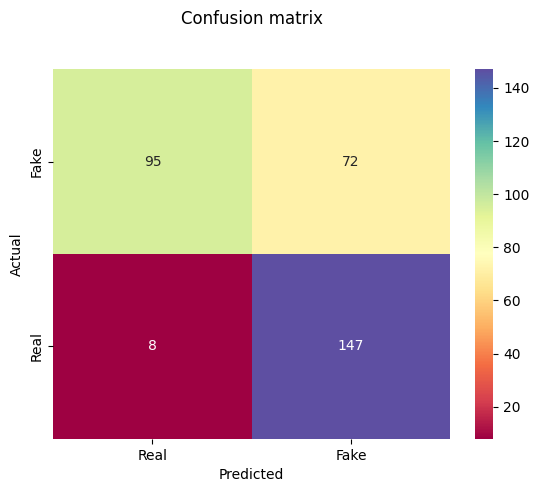

In [11]:
#Imports numpy,matplot and seaborn libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Renders the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=sns.color_palette("Spectral", as_cmap=True) ,fmt='g',xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.ylabel('Actual') #Labels the Y axis as Actual
plt.xlabel('Predicted') #Labels the X axis as Predicted
plt.show()

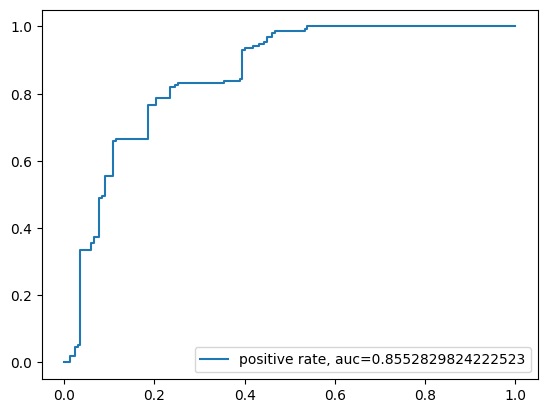

In [12]:
y_pred_proba = lrmodel.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposrate, trueposrate, _ = metrics.roc_curve(y_test,  y_pred_proba) #Gets the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba) #Calculates AUC scaore
plt.plot(falseposrate,trueposrate,label="positive rate, auc="+str(auc)) #Plots the false postive rate and true positive rate
plt.legend(loc=4) #Sets location of the legend
plt.show()

### Conclusion

*The logistic regression model yield an accuracy of 0.751 with and f1-score of 0.70 for real videos and 0.79 for fake videos and an ACU value of 0.855. This shows that this model can dectect the AI generated videos relatively well.*